In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

### 比率の区間推定

In [4]:
stats.binom.interval(confidence=0.95, n=1000, p=0.6)

(570.0, 630.0)

In [5]:
stats.binom.interval(confidence=0.99, n=1000, p=0.6)

(560.0, 640.0)

In [7]:
df = sns.load_dataset('tips')
df['tip_rate'] = df['tip'] / df['total_bill']
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


In [21]:
n = 50
m = 100
alpha = 0.95
population_male_ratio = len(df[df['sex']=='Male']) / len(df)
results = []

for _ in range(m):
    sample_df = df.sample(n)
    male_ratio = len(sample_df[sample_df['sex']=='Male']) / len(sample_df) 
    min_num, max_num = stats.binom.interval(alpha, n=n, p=male_ratio)
    min_ratio = min_num / n
    max_ratio = max_num / n
    correct = min_ratio < population_male_ratio < max_ratio
    results.append(({'min': min_ratio, 'max': max_ratio, 'correct': correct}))

In [22]:
len(df[df['sex']=='Male']) / len(df)

0.6434426229508197

In [23]:
result_df = pd.DataFrame(results)
result_df

,min,max,correct
0,0.50,0.76,True
1,0.54,0.80,True
2,0.60,0.84,True
3,0.46,0.74,True
4,0.48,0.76,True
...,...,...,...
95,0.50,0.76,True
96,0.50,0.76,True
97,0.50,0.76,True
98,0.46,0.74,True


In [24]:
result_df['correct'].value_counts()

True     98
False     2
Name: correct, dtype: int64

### 平均の区間推定 ※標本サイズが大きい場合

In [26]:
stats.norm.interval(confidence=0.95, loc=3, scale=1)

(1.040036015459946, 4.959963984540054)

In [55]:
n = 50
m = 100
confidence = 0.95
population_tip_mean = np.mean(df['tip'])
results = []

for _ in range(m):
    sample_df = df.sample(n)
    sample_mean = np.mean(sample_df['tip']) 
    sample_uvar = np.var(sample_df['tip'], ddof=1)
    min_val, max_val = stats.norm.interval(confidence, loc=sample_mean, scale=np.sqrt(sample_uvar/n))
    correct = min_val < population_tip_mean < max_val
    results.append(({'min': min_val, 'max': max_val, 'correct': correct}))

In [56]:
np.mean(df['tip'])

2.99827868852459

In [57]:
result_df = pd.DataFrame(results)
result_df

,min,max,correct
0,2.869997,3.830003,True
1,2.521336,3.239064,True
2,2.721652,3.695548,True
3,2.699032,3.631368,True
4,2.623723,3.481077,True
...,...,...,...
95,2.673929,3.279671,True
96,2.514168,3.344632,True
97,2.681476,3.318124,True
98,2.670380,3.446420,True


In [58]:
result_df['correct'].value_counts()

True     94
False     6
Name: correct, dtype: int64

### t分布

In [62]:
# t分布
stats.t(df=2).rvs()

-1.273609508005294

In [68]:
a = 'hello'
f"{a} world"

'hello world'

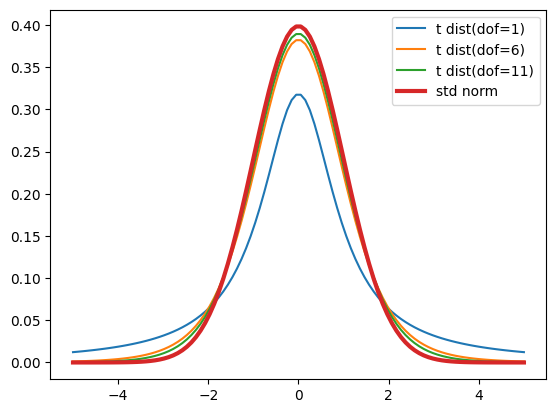

In [69]:
x = np.linspace(-5, 5, 100)
z = stats.norm.pdf(x)

for dof in range(1, 12, 5):
    t = stats.t(dof).pdf(x)
    plt.plot(x, t, label=f"t dist(dof={dof})")
plt.plot(x, z, label='std norm', linewidth=3)
plt.legend()

### 平均の区間推定 ※標本サイズが小さい場合

In [82]:
column = 'tip'
n = 50
m = 100
confidence = 0.95
population_tip_mean = np.mean(df[column])
results = []

for _ in range(m):
    sample_df = df.sample(n)
    sample_mean = np.mean(sample_df[column]) 
    sample_uvar = np.var(sample_df[column], ddof=1)
    min_val_t, max_val_t = stats.t.interval(confidence, loc=sample_mean, scale=np.sqrt(sample_uvar/n), df=n-1)
    correct = min_val_t < population_tip_mean < max_val_t
    results.append(({'min': min_val_t, 'max': max_val_t, 'correct': correct}))

In [83]:
result_df = pd.DataFrame(results)
result_df

,min,max,correct
0,2.958477,3.894323,True
1,2.770947,3.668253,True
2,3.054147,4.086253,False
3,2.573927,3.292473,True
4,2.653277,3.382323,True
...,...,...,...
95,2.512479,3.261121,True
96,2.549267,3.335533,True
97,2.557056,3.214544,True
98,2.586073,3.494727,True


In [84]:
result_df['correct'].value_counts()

True     96
False     4
Name: correct, dtype: int64